In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
booking_data = pd.read_excel('data.xlsx', usecols=['Booking ID','Booking Date', 'Arrival Date', 'Lead Time', 'Nights', 'Guests', 'Distribution Channel', 'Customer Type', 'Country', 'Deposit Type', 'Avg Daily Rate', 'Cancelled (0/1)', 'Revenue', 'Revenue Loss', 'Status'])

In [9]:
booking_data.head()

,Booking ID,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Cancelled (0/1),Revenue,Revenue Loss
0,1,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,0,0.0,0.0
1,2,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,0,0.0,0.0
2,3,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,0,75.0,0.0
3,4,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,0,75.0,0.0
4,5,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,0,196.0,0.0


In [10]:
booking_data['Year'] = booking_data['Arrival Date'].dt.year
booking_data['Month'] = booking_data['Arrival Date'].dt.month

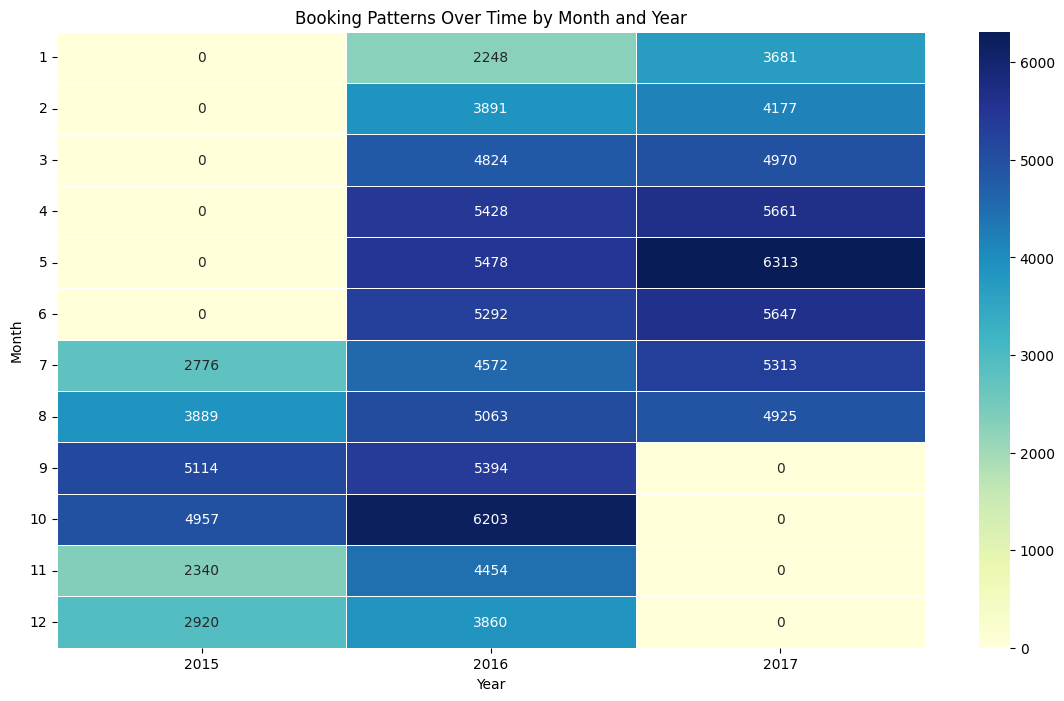

In [11]:
# Convert 'Arrival Date' to datetime format if not already done
booking_data['Arrival Date'] = pd.to_datetime(booking_data['Arrival Date'])

# Extract year and month for further analysis
booking_data['Year'] = booking_data['Arrival Date'].dt.year
booking_data['Month'] = booking_data['Arrival Date'].dt.month

# Group by year and month to count bookings
bookings_by_month_year = booking_data.groupby(['Year', 'Month']).size().reset_index(name='Bookings')

# Pivot the data for easier plotting
bookings_pivot = bookings_by_month_year.pivot(index='Month', columns='Year', values='Bookings').fillna(0)

# Proceeding with the corrected heatmap visualization
plt.figure(figsize=(14, 8))
sns.heatmap(bookings_pivot, annot=True, fmt="g", cmap="YlGnBu", linewidths=.5)
plt.title('Booking Patterns Over Time by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(rotation=0)  # Ensure month labels are horizontal for better readability
plt.show()

In [12]:
avg_lead_time_by_channel = booking_data.groupby('Distribution Channel')['Lead Time'].mean()

# Encode the customer type as a numeric variable
booking_data['Customer Type Encoded'] = booking_data['Customer Type'].astype('category').cat.codes

# Calculate the correlation between lead time and customer type
correlation_matrix = booking_data[['Lead Time', 'Customer Type Encoded']].corr()

# Output the results
print(avg_lead_time_by_channel)
print(correlation_matrix)

Distribution Channel
Corporate                44.910289
Direct                   57.829362
Offline Travel Agent    135.585261
Online Travel Agent     108.248798
Undefined                23.000000
Name: Lead Time, dtype: float64
                       Lead Time  Customer Type Encoded
Lead Time               1.000000               0.073403
Customer Type Encoded   0.073403               1.000000


In [13]:
total_bookings_by_channel = booking_data.groupby('Distribution Channel')['Booking ID'].count().reset_index(name='Total Bookings')

# Calculate the average ADR for each distribution channel
avg_adr_by_channel = booking_data.groupby('Distribution Channel')['Avg Daily Rate'].mean().reset_index(name='Average ADR')

# Combine the total bookings and average ADR into a single dataframe for comparison
channel_contribution_adr = total_bookings_by_channel.merge(avg_adr_by_channel, on='Distribution Channel')

channel_contribution_adr

,Distribution Channel,Total Bookings,Average ADR
0,Corporate,6677,69.325204
1,Direct,14645,106.654983
2,Offline Travel Agent,23991,87.145444
3,Online Travel Agent,74072,108.567791
4,Undefined,5,46.240000


In [14]:
guest_distribution = booking_data.groupby('Country').agg(Total_Guests=('Guests', 'sum'),
                                                         Total_Revenue=('Revenue', 'sum')).reset_index()

# Sort the results by 'Total_Revenue' to see which countries contribute most to the revenue
guest_distribution = guest_distribution.sort_values(by='Total_Revenue', ascending=False)

# Additionally, calculate the average revenue per guest by country
guest_distribution['Average_Revenue_Per_Guest'] = guest_distribution['Total_Revenue'] / guest_distribution['Total_Guests']

# Output the result
print(guest_distribution.head())  # Displays the top 5 countries by revenue

            Country  Total_Guests  Total_Revenue  Average_Revenue_Per_Guest
128        Portugal         90036     9037388.37                 100.375276
165  United Kingdom         24568     4152064.34                 169.002944
55           France         21579     3100696.28                 143.690453
148           Spain         18153     2282030.49                 125.710929
60          Germany         14198     2068354.65                 145.679296
